### Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

from pycaret.classification import *
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

### Data 전처리

In [2]:
df = pd.read_csv('./data/train.csv')
# df_te = pd.read_csv('./data/test.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [5]:
df.shape

(43957, 15)

In [6]:
new_col = {'income_>50K':'income'}
df = df.rename(columns=new_col)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [7]:
#NULL값 처리

df['workclass'] = df['workclass'].fillna('None')
df['occupation'] = df['occupation'].fillna('None')
df['native-country'] = df['native-country'].fillna('Others')
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

#### HeatMap

<AxesSubplot:>

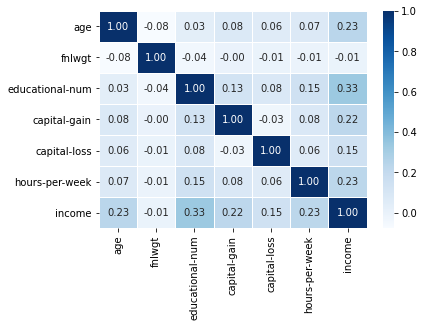

In [8]:
sns.heatmap(df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [9]:
df.drop(columns = ['fnlwgt', 'education', 'capital-gain', 'capital-loss', 'race', 'gender'], inplace = True)
df.head()

,age,workclass,educational-num,marital-status,occupation,relationship,hours-per-week,native-country,income
0,67,Private,16,Divorced,Exec-managerial,Not-in-family,60,United-States,1
1,17,Private,8,Never-married,Other-service,Own-child,15,United-States,0
2,31,Private,13,Married-civ-spouse,Exec-managerial,Husband,40,United-States,1
3,58,State-gov,4,Married-civ-spouse,Transport-moving,Husband,40,United-States,0
4,25,State-gov,10,Never-married,Other-service,Not-in-family,40,United-States,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        43957 non-null  object
 2   educational-num  43957 non-null  int64 
 3   marital-status   43957 non-null  object
 4   occupation       43957 non-null  object
 5   relationship     43957 non-null  object
 6   hours-per-week   43957 non-null  int64 
 7   native-country   43957 non-null  object
 8   income           43957 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.0+ MB


In [11]:
df = df[df['native-country'] == 'United-States']
df.drop(columns = ['native-country'], inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39429 entries, 0 to 43956
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              39429 non-null  int64 
 1   workclass        39429 non-null  object
 2   educational-num  39429 non-null  int64 
 3   marital-status   39429 non-null  object
 4   occupation       39429 non-null  object
 5   relationship     39429 non-null  object
 6   hours-per-week   39429 non-null  int64 
 7   income           39429 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 2.7+ MB


In [13]:
df.loc[df['relationship'].isin(['Husband', 'Wife']), 'relationship'] = 'H&W'

In [14]:
df = df[(df['workclass'] != 'Without-pay') & (df['workclass'] != 'Never-worked')]
df = df[(df['marital-status'] != 'Married-AF-spouse')]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39372 entries, 0 to 43956
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              39372 non-null  int64 
 1   workclass        39372 non-null  object
 2   educational-num  39372 non-null  int64 
 3   marital-status   39372 non-null  object
 4   occupation       39372 non-null  object
 5   relationship     39372 non-null  object
 6   hours-per-week   39372 non-null  int64 
 7   income           39372 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 2.7+ MB


In [16]:
df = pd.get_dummies(df)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39372 entries, 0 to 43956
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   39372 non-null  int64
 1   educational-num                       39372 non-null  int64
 2   hours-per-week                        39372 non-null  int64
 3   income                                39372 non-null  int64
 4   workclass_Federal-gov                 39372 non-null  uint8
 5   workclass_Local-gov                   39372 non-null  uint8
 6   workclass_None                        39372 non-null  uint8
 7   workclass_Private                     39372 non-null  uint8
 8   workclass_Self-emp-inc                39372 non-null  uint8
 9   workclass_Self-emp-not-inc            39372 non-null  uint8
 10  workclass_State-gov                   39372 non-null  uint8
 11  marital-status_Divorced               393

In [18]:
df['educational-num'].value_counts()

9     13071
10     9067
13     6465
14     2123
11     1700
7      1496
12     1323
6      1124
4       664
15      654
5       534
8       496
16      432
3       147
2        54
1        22
Name: educational-num, dtype: int64

In [19]:
# educational-num 편집
print(df.shape)
df = df[df['educational-num'] != 1]
print(df.shape)
df.loc[df['educational-num'].isin([2, 3]), 'educational-num'] = 0
df.loc[df['educational-num'].isin([4, 5]), 'educational-num'] = 1
df.loc[df['educational-num'].isin([6, 7, 8]), 'educational-num'] = 2
for i in range(9, 17):
    df.loc[df['educational-num'].isin([i]), 'educational-num'] = i - 6
print(df['educational-num'].value_counts())

(39372, 37)
(39350, 37)
3     13071
4      9067
7      6465
2      3116
8      2123
5      1700
6      1323
1      1198
9       654
10      432
0       201
Name: educational-num, dtype: int64


In [20]:
X = df.drop(columns = ['educational-num'])
y = df[['educational-num']]

In [21]:
X

,age,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_None,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_None,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_H&W,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried
0,67,60,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,17,15,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,31,40,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,58,40,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,25,40,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,50,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
43953,19,40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
43954,30,58,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
43955,46,35,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [22]:
y

,educational-num
0,10
1,2
2,7
3,1
4,4
...,...
43952,7
43953,3
43954,4
43955,7


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                  y, 
                                                  test_size=0.01, 
                                                  random_state=42,
                                                  stratify = y)

In [24]:
y_train.value_counts()

educational-num
3                  12940
4                   8976
7                   6400
2                   3085
8                   2102
5                   1683
6                   1310
1                   1186
9                    647
10                   428
0                    199
dtype: int64

In [25]:
y_test.value_counts()

educational-num
3                  131
4                   91
7                   65
2                   31
8                   21
5                   17
6                   13
1                   12
9                    7
10                   4
0                    2
dtype: int64

### pycaret

In [96]:
train = pd.concat([X_train, y_train], axis = 1)
train

,age,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_None,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_H&W,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,educational-num
17428,40,40,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,3
29484,50,32,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,3
3191,39,20,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,6
13173,36,40,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,8
35918,41,38,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33411,35,55,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,7
39120,53,40,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,4
17098,52,36,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,8
4913,24,40,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,7


In [97]:
# 환경 설정
clf = setup(data = train, target = 'educational-num', session_id = 123, silent = True, use_gpu = True)

,Description,Value
0,session_id,123
1,Target,educational-num
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 10: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10"
4,Original Data,"(39012, 40)"
5,Missing Values,False
6,Numeric Features,38
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [56]:
# 모델들의 정확도 출력
compare_models(sort = 'F1', n_select = 1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.4473,0.7395,0.2381,0.4264,0.4031,0.2586,0.2705,15.6710
xgboost,Extreme Gradient Boosting,0.4439,0.7371,0.2350,0.4212,0.3988,0.2534,0.2665,9.6960
lightgbm,Light Gradient Boosting Machine,0.4459,0.7399,0.2374,0.4257,0.3979,0.2551,0.2701,1.1590
gbc,Gradient Boosting Classifier,0.4504,0.7445,0.2354,0.4327,0.3959,0.2554,0.2754,26.9140
ada,Ada Boost Classifier,0.4239,0.6170,0.2194,0.3856,0.3765,0.2307,0.2418,0.9110
lr,Logistic Regression,0.4268,0.7239,0.1972,0.3846,0.3658,0.2216,0.2353,16.1230
lda,Linear Discriminant Analysis,0.3976,0.7150,0.2496,0.3644,0.3652,0.2110,0.2161,0.1530
rf,Random Forest Classifier,0.3634,0.6709,0.2208,0.3456,0.3520,0.1817,0.1824,4.2980
et,Extra Trees Classifier,0.3505,0.6373,0.2150,0.3349,0.3406,0.1672,0.1679,5.9500
ridge,Ridge Classifier,0.4171,0.0000,0.1489,0.3617,0.3358,0.1999,0.2160,0.0390


In [26]:
xgb = XGBClassifier()
lgb = LGBMClassifier()
cat = CatBoostClassifier(silent = True)

# XGBoostClassifier 학습,예측,정확도 출력
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print('XGBoostClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, xgb_pred)))

# LightGBMBoostClassifier 학습,예측,정확도 출력
lgb.fit(X_train, y_train)
lgb_pred = lgb.predict(X_test)
print('LightGBMBoostClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, lgb_pred)))

# CatBoostClassifier 학습,예측,정확도 출력
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)
print('CatBoostClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, cat_pred)))

[23:05:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoostClassifier 정확도: 0.4594
LightGBMBoostClassifier 정확도: 0.4416
CatBoostClassifier 정확도: 0.4518
